Importing Dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Preprocessing


In [3]:
#Creating Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data =pd.read_csv('/content/exercise.csv')

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining Calories column with the Excercise data


In [7]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
# Checking the number of rows and columns
calories_data.shape

(15000, 9)

In [10]:
# Getting to know more information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [12]:
#Satistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [13]:
sns.set()

<ipython-input-18-6edfb58b2d68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=calories_data, palette=['skyblue', 'lightcoral'])


<Axes: xlabel='Gender', ylabel='count'>

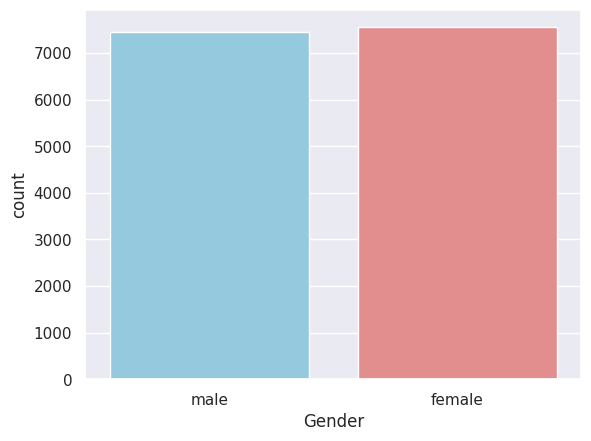

In [18]:
#Finding the distribution of Males and Females
#Ploting the gender column in count plot
sns.countplot(x='Gender', data=calories_data, palette=['skyblue', 'lightcoral'])


<ipython-input-22-9df4d32b08ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

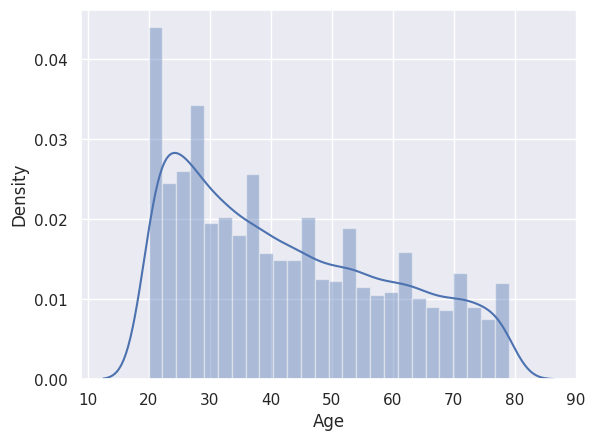

In [22]:
#Finding the distribution of age column
sns.distplot(calories_data['Age'])

<ipython-input-23-189a4e00a5a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

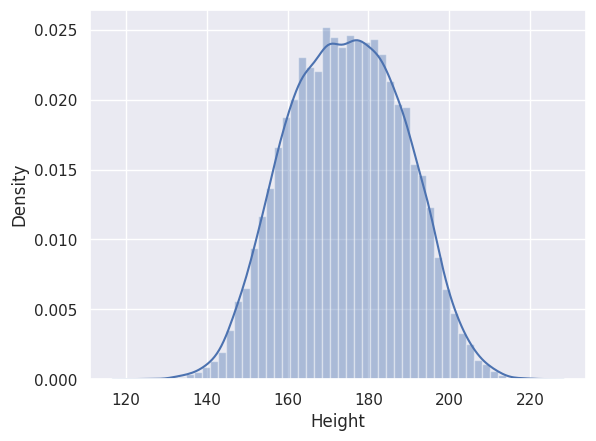

In [23]:
#Finding the distribution of 'Height' column
sns.distplot(calories_data['Height'])

<ipython-input-24-dee1146d5841>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

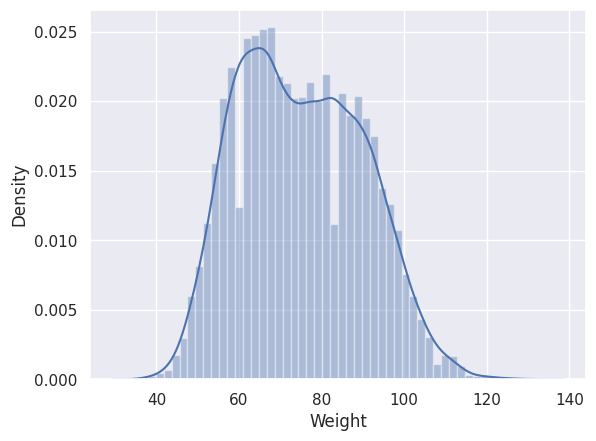

In [24]:
#Finding the distribution of 'Weight' column
sns.distplot(calories_data['Weight'])

<ipython-input-25-c394efa136fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

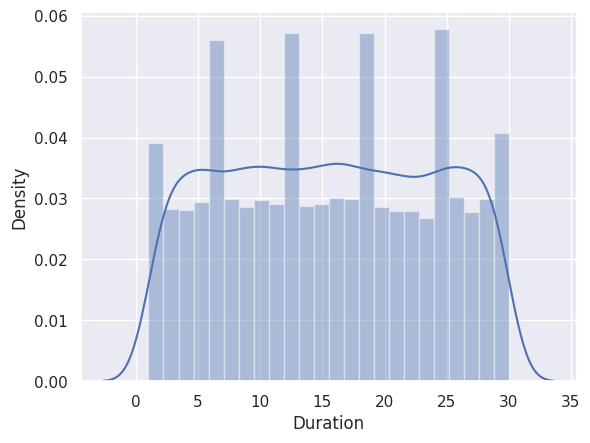

In [25]:
#Finding the distribution of 'Duration' column
sns.distplot(calories_data['Duration'])

<ipython-input-26-8ba28a7305be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

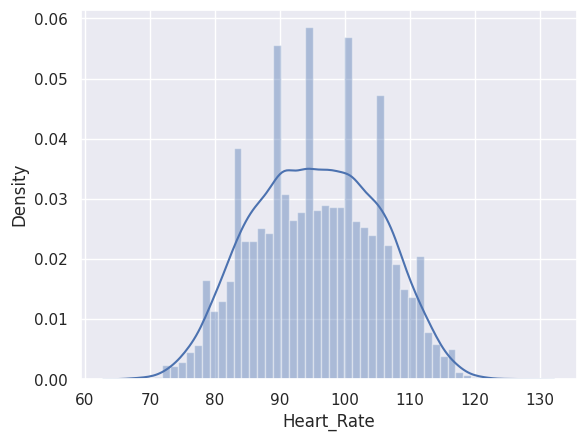

In [26]:
#Finding the distribution of 'Heart_Rate' column
sns.distplot(calories_data['Heart_Rate'])

<ipython-input-27-38de07a41b0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

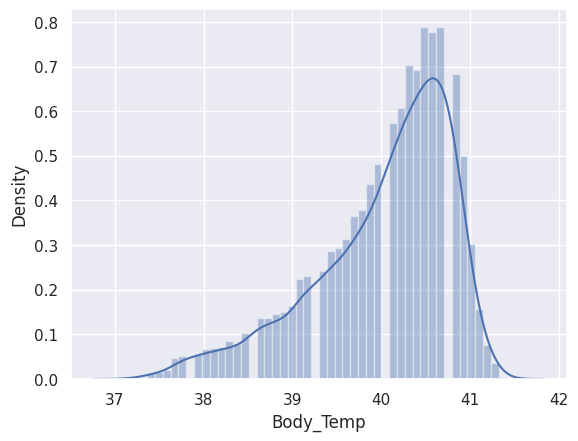

In [27]:
#Finding the distribution of 'Body_Temp' column
sns.distplot(calories_data['Body_Temp'])

Finding the Correlation in the Dataset

In [31]:
# Convert Gender column to numeric
calories_data['Gender'] = calories_data['Gender'].map({'male': 1, 'female': 0})

# Now calculate the correlation
correlation = calories_data.corr()
print(correlation)


             User_ID    Gender       Age    Height  ...  Duration  Heart_Rate  Body_Temp  Calories
User_ID     1.000000 -0.000687 -0.001827 -0.013520  ... -0.002751   -0.000457   0.000923 -0.001661
Gender     -0.000687  1.000000  0.003222  0.710534  ...  0.003440    0.011555   0.007264  0.022357
Age        -0.001827  0.003222  1.000000  0.009554  ...  0.013247    0.010482   0.013175  0.154395
Height     -0.013520  0.710534  0.009554  1.000000  ... -0.004625    0.000528   0.001200  0.017537
Weight     -0.011603  0.783186  0.090094  0.958451  ... -0.001884    0.004311   0.004095  0.035481
Duration   -0.002751  0.003440  0.013247 -0.004625  ...  1.000000    0.852869   0.903167  0.955421
Heart_Rate -0.000457  0.011555  0.010482  0.000528  ...  0.852869    1.000000   0.771529  0.897882
Body_Temp   0.000923  0.007264  0.013175  0.001200  ...  0.903167    0.771529   1.000000  0.824558
Calories   -0.001661  0.022357  0.154395  0.017537  ...  0.955421    0.897882   0.824558  1.000000

[9 rows x

<Axes: >

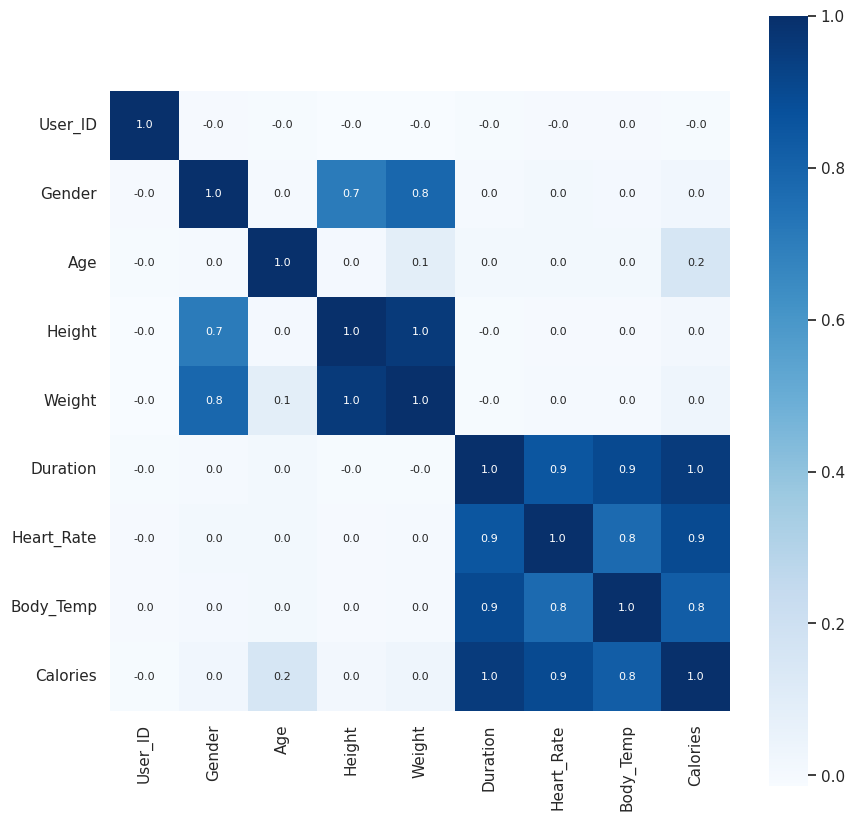

In [32]:
# constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Converting the text column to numerical

In [33]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [34]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating Features and Target

In [36]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [37]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [38]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training and testing data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Training the Model

XGBoost Regressor

In [41]:
# loading the model
model = XGBRegressor()

In [42]:
#Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the Model

we will evaluate the model on the test data

In [43]:
test_data_prediction = model.predict(X_test)

In [44]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Comparing our predicted values with the original values

Mean Absolute Error

In [45]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [46]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


In [48]:
input_data = (1,68,190,94,29,105,40)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The Calories Burst is', prediction[0])

[236.9938]
The Calories Burst is 236.9938
